# Meta M1 - Filipe Silva e Gonçalo Santos

### Informação e Operações de Limpeza dos Dados

##### Importar as Bibliotecas

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

##### Carregar o Dataset com a Biblioteca Pandas

In [254]:
employee_df=pd.read_csv('Employee.csv')

##### Visualizar as Primeiras 5 Instâncias do Dataset

In [255]:
employee_df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


##### Obter as Dimenções do Dataset

In [256]:
employee_df.shape

(4653, 9)

##### Acessar os Nomes das Colunas

In [257]:
employee_df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

##### Verificar Valores em Falta no Dataset

In [258]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [259]:
employee_df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

##### Apagar Duplicados e Verificar Novamente as Dimenções do Dataset

In [260]:
employee_df.drop_duplicates(subset=None, inplace=True)
employee_df.shape

(2764, 9)

##### Principais Estatísticas das Features Numéricas

In [261]:
employee_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000



### Visualização de Dados

##### Heatmap de Correlação

C:\Users\Filipe Silva\AppData\Local\Temp\ipykernel_13480\466152103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(employee_df.corr(),cmap="flare")


<AxesSubplot: >

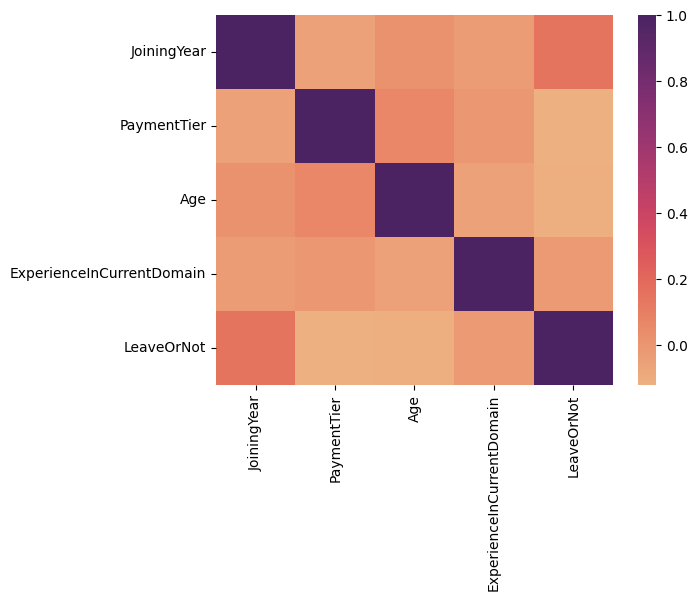

In [262]:
sns.heatmap(employee_df.corr(),cmap="flare")

##### Pie Chart % of Gender

Text(0.5, 1.0, '% of Gender')

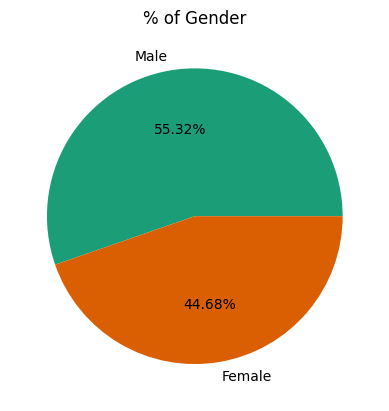

In [265]:
labels = ['Male', 'Female']
sizes = [employee_df['Gender'].value_counts()['Male'],
         employee_df['Gender'].value_counts()['Female']
        ]
colors = sns.color_palette('Dark2')[0:2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title("% of Gender")

##### Pie Chart % of Payment Tier

Text(0.5, 1.0, '% of Payment Tier')

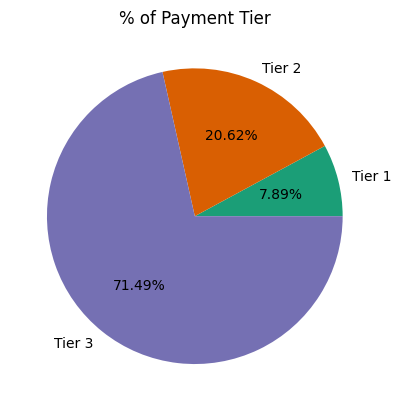

In [266]:
labels = ['Tier 1', 'Tier 2', 'Tier 3']
colors = sns.color_palette('Dark2')[0:3]
sizes = [employee_df['PaymentTier'].value_counts()[1],
         employee_df['PaymentTier'].value_counts()[2],
         employee_df['PaymentTier'].value_counts()[3]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title("% of Payment Tier")

##### Distribution of Ages Histogram

(array([  0.,   0.,  31.,  41., 161., 167., 179., 218., 365., 180., 186.,
        115., 113., 114., 118., 110., 121., 119., 117., 115., 119.,  75.,
          0.,   0.]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
        33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.]),
 <BarContainer object of 24 artists>)

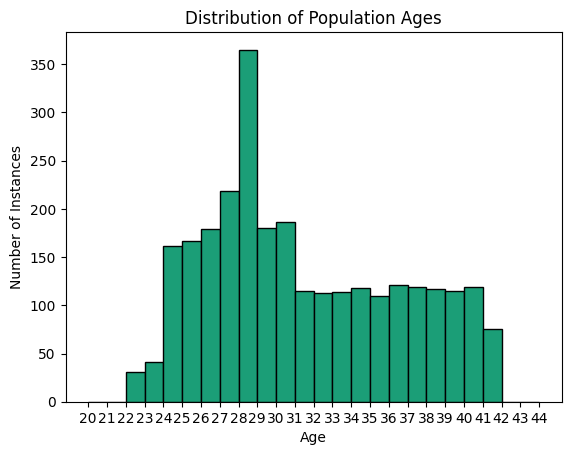

In [264]:
bins = np.arange(20, 45, 1)
color = sns.color_palette('Dark2')[0:1]
plt.title('Distribution of Population Ages')
plt.xlabel("Age")
plt.ylabel('Number of Instances')
plt.xticks(range(20,45,1))
plt.hist(employee_df['Age'], bins=bins, color=color, edgecolor='black', linewidth=1)

##### Employee Education Bar Chart

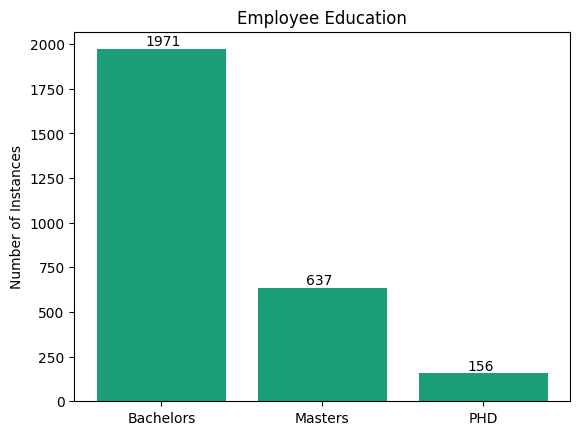

In [263]:
educationTypes=['Bachelors','Masters','PHD']
educationCount = employee_df['Education'].value_counts()['Bachelors'], employee_df['Education'].value_counts()['Masters'], employee_df['Education'].value_counts()['PHD']
plt.bar(educationTypes, educationCount, color=color)
plt.title('Employee Education')
plt.ylabel('Number of Instances')
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
for i, v in enumerate(educationCount):plt.text(xlocs[i] - 1.10, v+20, str(v))

##### EverBenched Countplot

[Text(0, 0, '2403'), Text(0, 0, '361')]

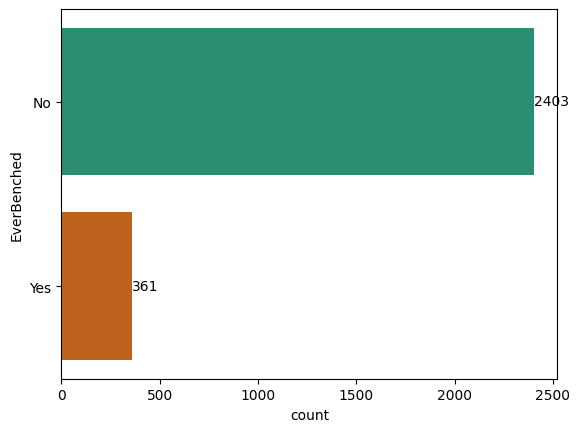

In [270]:
ax = sns.countplot(y=employee_df['EverBenched'],palette='Dark2')
ax.bar_label(ax.containers[0])

##### EverBenched and LeaveOrNot Countplot Chart

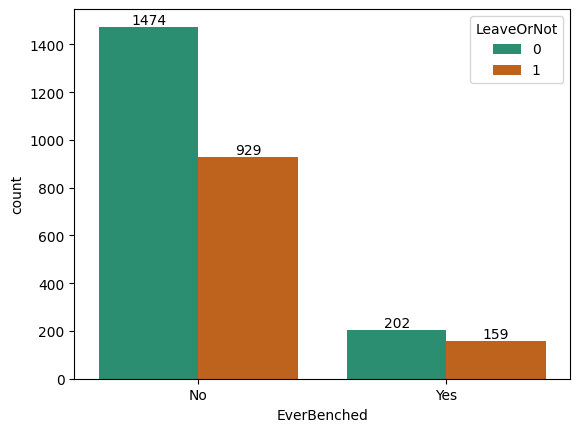

In [269]:
ax3 = sns.countplot(data = employee_df ,x='EverBenched',hue='LeaveOrNot',palette="Dark2")
for i in ax3.containers:
    ax3.bar_label(i,)

##### LeaveOrNot Countplot Chart

[Text(0, 0, '1676'), Text(0, 0, '1088')]

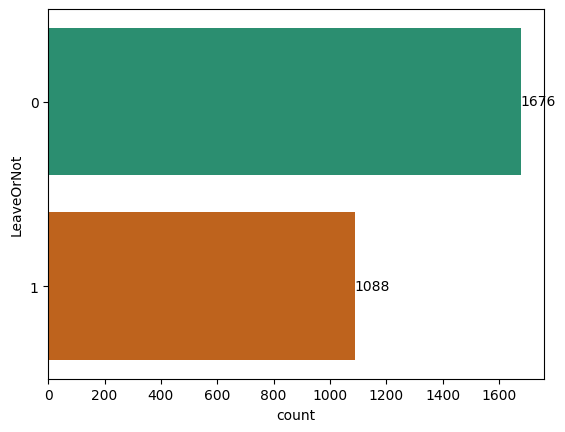

In [267]:
ax = sns.countplot(y=employee_df['LeaveOrNot'],palette='Dark2')
ax.bar_label(ax.containers[0])

##### JoiningYear and LeaveOrNot Countplot Chart

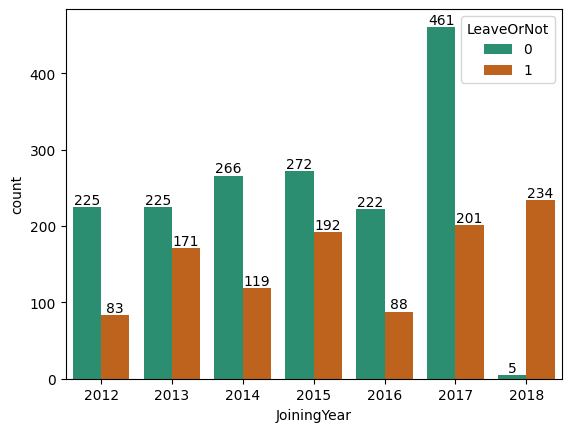

In [268]:
year_employee_df=employee_df.copy()
year_employee_df['JoiningYear'] = year_employee_df['JoiningYear'].astype('object')
ax2=sns.countplot(data = year_employee_df ,x='JoiningYear',hue='LeaveOrNot',palette='Dark2')
for i in ax2.containers:
    ax2.bar_label(i,)

##### Meter info aqui

[Text(0, 0, '287'),
 Text(0, 0, '433'),
 Text(0, 0, '681'),
 Text(0, 0, '451'),
 Text(0, 0, '425'),
 Text(0, 0, '470'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

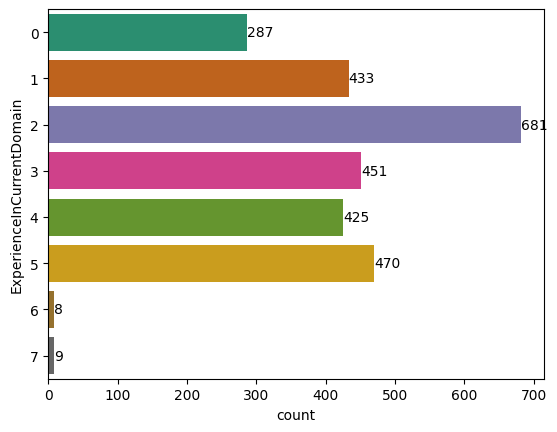

In [271]:
ax = sns.countplot(y=employee_df['ExperienceInCurrentDomain'],palette='Dark2')
ax.bar_label(ax.containers[0])

##### Meter info aqui

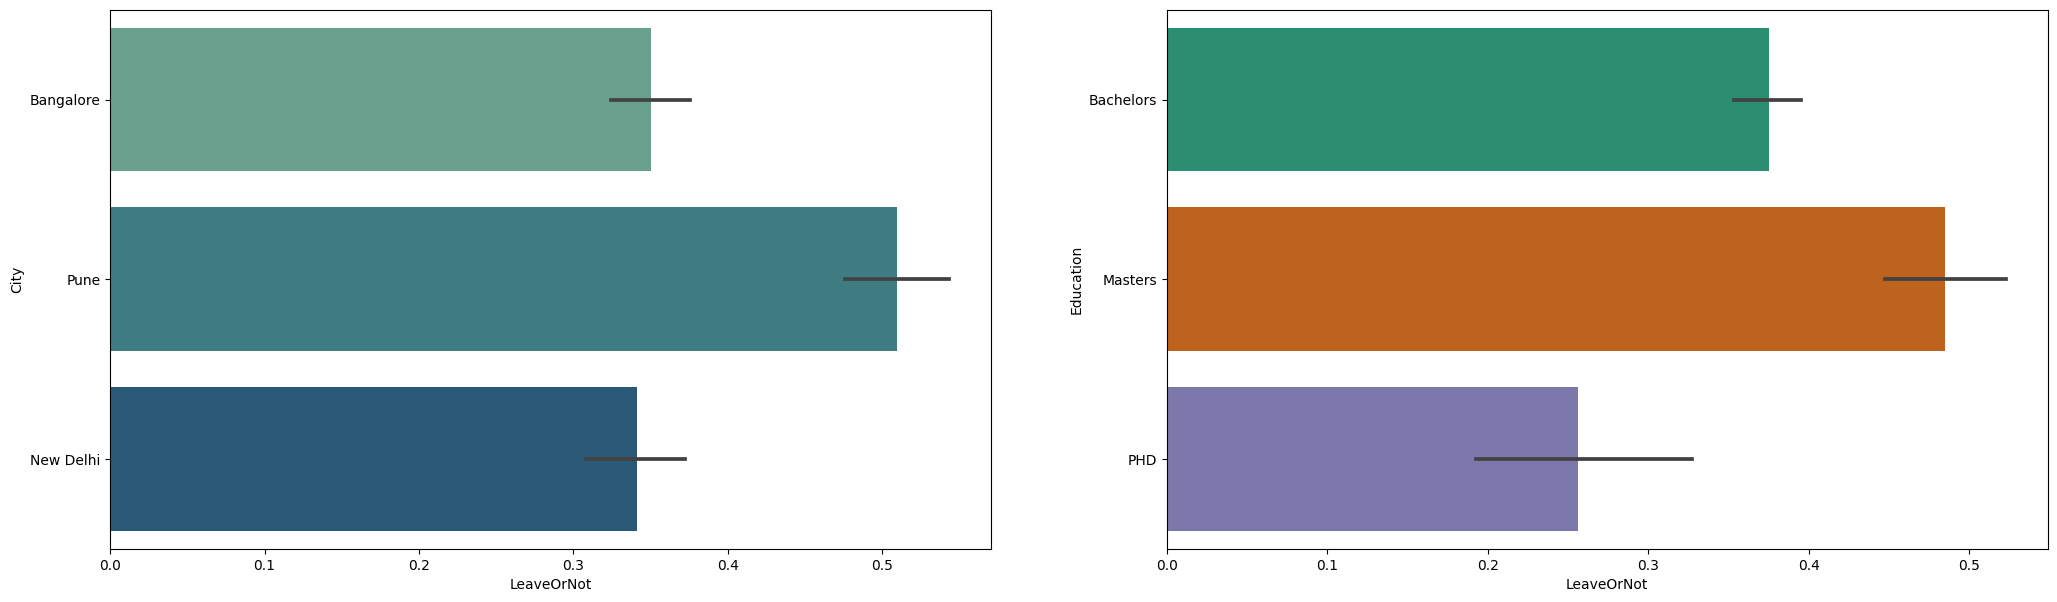

In [272]:
fig,ax=plt.subplots(1,2,figsize=(7,7))
sns.barplot(x='LeaveOrNot',y='City',data=employee_df,palette='crest',ax=ax[0])
sns.barplot(x='LeaveOrNot',y='Education',palette='Dark2',ax=ax[1],data=employee_df)
fig.set_figwidth(25)

##### Meter info aqui

<AxesSubplot: >

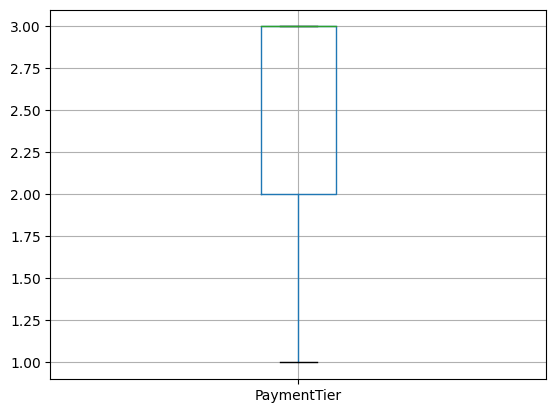

In [273]:
%matplotlib inline
num_cols = ['PaymentTier']
employee_df.boxplot(num_cols)

In [ ]:
%matplotlib inline
num_cols = ['PaymentTier']
employee_df.boxplot(num_cols)

### Pré-Processamento de Dados

##### Criar o Dataset de Treino e de Teste Baseado numa Separação Aleatória de 80%/20%

In [274]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(employee_df, test_size=0.2,random_state=1)

##### Separação de Labels e Instâncias do Dataframe de Treino e Teste

In [275]:
train_set_labels=train_set[['LeaveOrNot']].copy()
train_set_instances=train_set.drop('LeaveOrNot',axis=1).copy()

test_set_labels=test_set[['LeaveOrNot']].copy()
test_set_instances=test_set.drop('LeaveOrNot',axis=1).copy()

##### Dimensões do Dataset de Treino e de Teste

In [276]:
train_set_instances.shape

(2211, 8)

In [277]:
train_set_instances.shape

(2211, 8)

##### Devisão de Atributos Numéricos, Categóricos e Ordinais

In [278]:
train_set_instances_num=train_set[['JoiningYear', 'Age', 'ExperienceInCurrentDomain']].copy()
train_set_instances_cat=train_set[['City', 'Gender', 'EverBenched']].copy()
train_set_instances_ord=train_set[['Education', 'PaymentTier']].copy()

##### Pipeline de Codificação e Estandardização

In [279]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

attr_num = train_set_instances_num.columns
attr_ord = train_set_instances_ord.columns
attr_cat = train_set_instances_cat.columns

global_pipeline=ColumnTransformer([
    ('num', StandardScaler(),attr_num),
    ('ord', OrdinalEncoder(), attr_ord),
    ('cat', OneHotEncoder(),attr_cat)
])
train_preprocessed=global_pipeline.fit_transform(train_set)

train_preprocessed

,num__JoiningYear,num__Age,num__ExperienceInCurrentDomain,ord__Education,ord__PaymentTier,cat__City_Bangalore,cat__City_New Delhi,cat__City_Pune,cat__Gender_Female,cat__Gender_Male,cat__EverBenched_No,cat__EverBenched_Yes
0,-1.639290,1.973869,-1.658249,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.107141,0.796999,0.215225,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.574991,1.385434,-0.409266,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-1.639290,-0.183725,-1.033758,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.042842,0.796999,0.215225,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2206,1.021457,-0.968305,0.839716,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2207,1.021457,-0.576015,-1.033758,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2208,-1.639290,-0.183725,-1.033758,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2209,1.021457,-0.772160,1.464208,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
